As per the target variable distribution and the correlation of featutures with the target variable, the Linear regression is not a recomended method. But still to understand the simplest method's result, we are just trying this.

In this we are planning to do the below steps to understand the linear regression perrformance in the data
1. Feature correlation
2. Forward Feature selection
3. RFE
4. Linear regression with FFS features & RFE selected features
5. Lasso Linear Regression
6. Ridge Linear Regression

## Load packages

In [1]:
## Load packages
%matplotlib inline    
# Line magic command will make plot outputs appear and be stored within the notebook.
import matplotlib.pyplot as plt   # matplotlib's plotting framework

import numpy as np    # fundamental package for scientific computing
import pandas as pd   # Python Data Analysis Library
import seaborn as sns # library for making statistical graphics in Python
import os             # operating system dependent functionality, file descriptor..

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
debug_test = True

In [2]:
# Let's check what data files are available.
PATH="./../datasets/"
os.listdir(PATH)

['dengue_test_iq.pkl',
 'dengue_test_sj.pkl',
 'dengue_train_iq.pkl',
 'dengue_train_sj.pkl',
 'test_iq_month_1.pkl',
 'test_iq_month_10.pkl',
 'test_iq_month_11.pkl',
 'test_iq_month_12.pkl',
 'test_iq_month_2.pkl',
 'test_iq_month_3.pkl',
 'test_iq_month_4.pkl',
 'test_iq_month_5.pkl',
 'test_iq_month_6.pkl',
 'test_iq_month_7.pkl',
 'test_iq_month_8.pkl',
 'test_iq_month_9.pkl',
 'test_sj_month_1.pkl',
 'test_sj_month_10.pkl',
 'test_sj_month_11.pkl',
 'test_sj_month_12.pkl',
 'test_sj_month_2.pkl',
 'test_sj_month_3.pkl',
 'test_sj_month_4.pkl',
 'test_sj_month_5.pkl',
 'test_sj_month_6.pkl',
 'test_sj_month_7.pkl',
 'test_sj_month_8.pkl',
 'test_sj_month_9.pkl',
 'train_iq_month_1.pkl',
 'train_iq_month_10.pkl',
 'train_iq_month_11.pkl',
 'train_iq_month_12.pkl',
 'train_iq_month_2.pkl',
 'train_iq_month_3.pkl',
 'train_iq_month_4.pkl',
 'train_iq_month_5.pkl',
 'train_iq_month_6.pkl',
 'train_iq_month_7.pkl',
 'train_iq_month_8.pkl',
 'train_iq_month_9.pkl',
 'train_sj_month_1.pk

In [3]:
# let's load the train and test data# let's load the train and test data
train_filename_sj = ( './../datasets/dengue_train_sj.pkl' )
train_filename_iq = ( './../datasets/dengue_train_iq.pkl' )
test_filename_sj = ( './../datasets/dengue_test_sj.pkl' )
test_filename_iq = ( './../datasets/dengue_test_iq.pkl' )

dengue_train_sj = pd.read_pickle( train_filename_sj )
dengue_train_iq = pd.read_pickle( train_filename_iq )
dengue_test_sj = pd.read_pickle( test_filename_sj )
dengue_test_iq = pd.read_pickle( test_filename_iq )

##### Feature Correlation Analysis

Lets check the feature correlation with target variable. Eventhough we did the feature correlation as part of EDA, i copied the same to here for the reference.

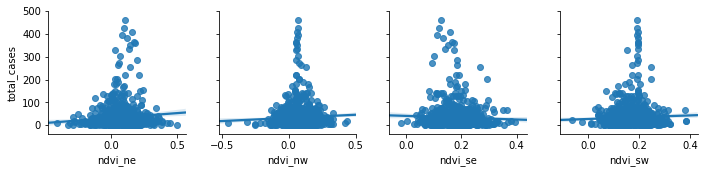

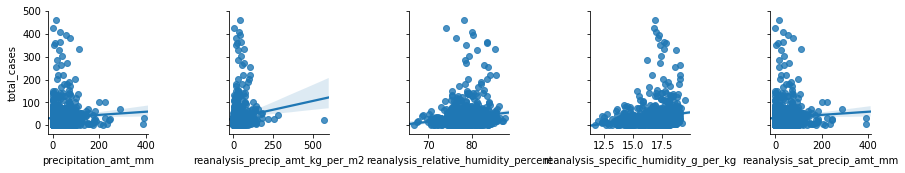

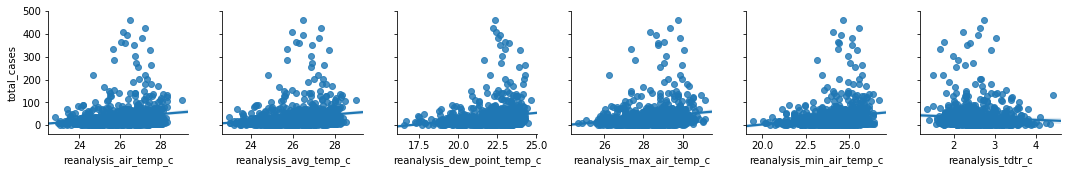

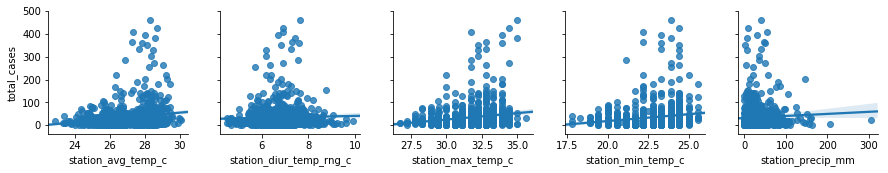

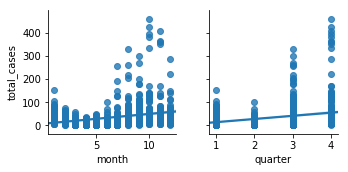

In [4]:
# plotting of pairwise relationships
sns.pairplot( dengue_train_sj, x_vars=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 
                                       'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
                                       'reanalysis_sat_precip_amt_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=[ 'reanalysis_air_temp_c',
                                        'reanalysis_avg_temp_c', 'reanalysis_dew_point_temp_c',
                                        'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
                                       'reanalysis_tdtr_c'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
                                       'station_min_temp_c', 'station_precip_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_sj, x_vars=['month', 'quarter'], y_vars=['total_cases'], kind="reg")

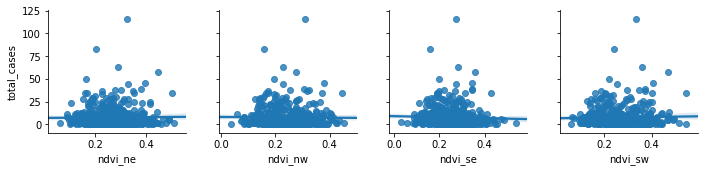

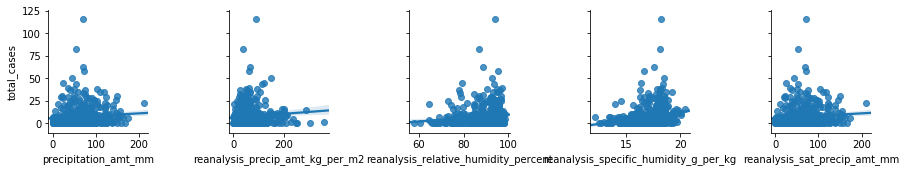

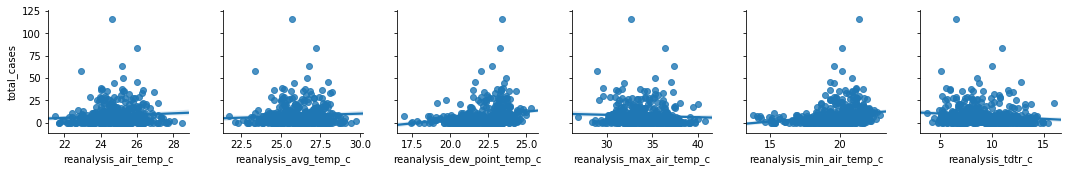

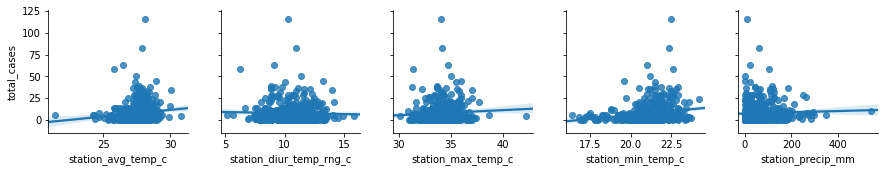

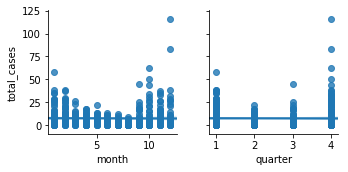

In [5]:
# plotting of pairwise relationships
sns.pairplot( dengue_train_iq, x_vars=['ndvi_ne', 'ndvi_nw', 'ndvi_se','ndvi_sw'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 
                                       'reanalysis_relative_humidity_percent','reanalysis_specific_humidity_g_per_kg',
                                       'reanalysis_sat_precip_amt_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=[ 'reanalysis_air_temp_c',
                                        'reanalysis_avg_temp_c', 'reanalysis_dew_point_temp_c',
                                        'reanalysis_max_air_temp_c', 'reanalysis_min_air_temp_c',
                                       'reanalysis_tdtr_c'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
                                       'station_min_temp_c', 'station_precip_mm'], y_vars=['total_cases'], kind="reg")
sns.pairplot( dengue_train_iq, x_vars=['month', 'quarter'], y_vars=['total_cases'], kind="reg")

As per the correlation graphs, none of the features are not linearly correlated to the target variable.

In [6]:
def split_data( data, split_date ):
    return data[data.index <= split_date].copy(), \
           data[data.index >  split_date].copy()

In [7]:
split_date_iq = '01-Jan-2008'
split_date_sj = '01-Jan-2006'
split_date_sj_start = '12-Dec-1998'
dengue_train_sj_bf_1999, dengue_train_sj_after_1998 = split_data( dengue_train_sj, split_date_sj_start )
#dengue_train_sj_after_1998 = dengue_train_sj;
Iq_train, Iq_test = split_data( dengue_train_iq, split_date_iq )
Sj_train, Sj_test = split_data( dengue_train_sj, split_date_sj )

Sj_train_af_1999, Sj_test_af_1999 = split_data( dengue_train_sj_after_1998, split_date_sj )

In [8]:
# splitting the data for train and test
X_iq_train = Iq_train
X_iq_test  = Iq_test
y_iq_train = Iq_train['total_cases']
y_iq_test  = Iq_test['total_cases']

X_sj_train = Sj_train
X_sj_test  = Sj_test
y_sj_train = Sj_train['total_cases']
y_sj_test  = Sj_test['total_cases']

X_sj_train_af_1999 = Sj_train_af_1999
X_sj_test_af_1999  = Sj_test_af_1999
y_sj_train_af_1999 = Sj_train_af_1999['total_cases']
y_sj_test_af_1999  = Sj_test_af_1999['total_cases']

X_iq_train.drop( columns = ['city','year','total_cases'], inplace = True )
X_iq_test.drop( columns  = ['city','year','total_cases'], inplace = True )
X_sj_train.drop( columns = ['city','year','total_cases'], inplace = True )
X_sj_test.drop( columns  = ['city','year','total_cases'], inplace = True )
X_sj_train_af_1999.drop( columns = ['city','year','total_cases'], inplace = True )
X_sj_test_af_1999.drop( columns  = ['city','year','total_cases'], inplace = True )

In [9]:
X_sj_train.shape

(813, 84)

In [10]:
X_sj_test.shape

(120, 84)

In [11]:
y_sj_train.shape

(813,)

In [12]:
y_sj_test.shape

(120,)

###### Linear regression

In [13]:
def linearRegression( X_train, y_train, X_test, y_test):#, normalize = False ):
    # Normalize is giving good result. so we are commenting it.
    #if( True == normalize ): 
    #    X_train = RobustScaler().fit_transform( X_train )
    #    X_test  = RobustScaler().fit_transform( X_test )
    model = LinearRegression()
    model.fit( X_train, y_train )
    pred = model.predict( X_test )
    score = model.score( X_test, y_test )
    return ( mean_absolute_error( y_test, pred ), pred, score )

In [14]:
linReg_sj_MAE, pred_sj, score_sj = linearRegression( X_sj_train, y_sj_train, X_sj_test, y_sj_test )
linReg_iq_MAE, pred_iq, score_iq = linearRegression( X_iq_train, y_iq_train, X_iq_test, y_iq_test )
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )
print( "Linear Regression Iquitos  MAE :" , linReg_iq_MAE )

Linear Regression San Juan MAE : 27.095238358308602
Linear Regression Iquitos  MAE : 9.113462241288609


We tried with the normalized data too. But the result is not good.

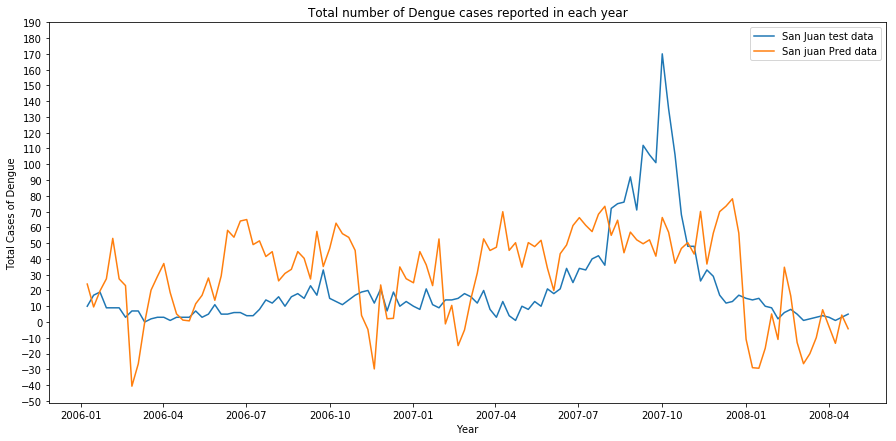

In [15]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( y_sj_test, label='San Juan test data' )
plt.plot( y_sj_test.index, pred_sj, label='San juan Pred data')
plt.yticks(np.arange(-50,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

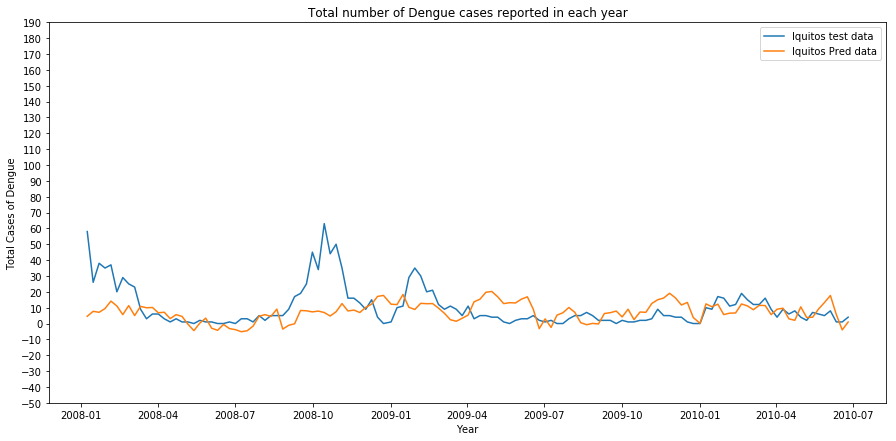

In [16]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( y_iq_test, label='Iquitos test data' )
plt.plot( y_iq_test.index, pred_iq, label='Iquitos Pred data')
plt.yticks(np.arange(-50,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

In [17]:
# San Juan data from 1999, bz lot of distortions we found on the previous data
linReg_sj_MAE, pred_sj, score_sj  = linearRegression( X_sj_train_af_1999, y_sj_train_af_1999, X_sj_test_af_1999, y_sj_test_af_1999 )
linReg_iq_MAE, pred_iq, score_iq  = linearRegression( X_iq_train, y_iq_train, X_iq_test, y_iq_test )
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )
print( "Linear Regression Iquitos  MAE :" , linReg_iq_MAE )

Linear Regression San Juan MAE : 17.167432914980512
Linear Regression Iquitos  MAE : 9.113462241288609


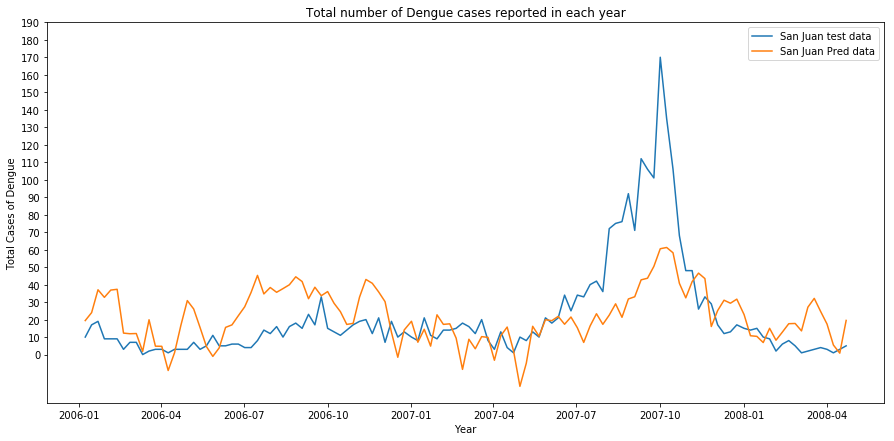

In [18]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( y_sj_test_af_1999, label='San Juan test data' )
plt.plot( y_sj_test_af_1999.index, pred_sj, label='San Juan Pred data')
#plt.plot( y_sj_test_af_1999.index, pred_nor, label='San juan Pred data norm')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

In [19]:
# using train_test_split. Earlier we split based on date.
X = pd.DataFrame( dengue_train_sj_after_1998 )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj_after_1998.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
linReg_sj_MAE, pred, score = linearRegression( X_train, y_train, X_test, y_test )
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )

X = pd.DataFrame( dengue_train_iq )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_iq.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

linReg_iq_MAE, pred, score = linearRegression( X_train, y_train, X_test, y_test )
print( "Linear Regression Iquitos MAE :" , linReg_iq_MAE )

Linear Regression San Juan MAE : 15.382971765602688
Linear Regression Iquitos MAE : 7.037949281604054


###### Forward Fearture selection

In [20]:
def forwardFeatureSelection( X_train, y_train, X_test, y_test, columns, show_steps = True ):
    # start with no predictors
    included = []
    # keep track of model and parameters
    best = {'feature': '', 'r2': 0, 'a_r2': 0}
    # create a model object to hold the modelling parameters
    model = LinearRegression() # create a model for Linear Regression
    # get the number of cases in the test data
    n = X_test.shape[0]

    while True:
        changed = False

        if show_steps:
            print('') 

        # list the features to be evaluated
        excluded = list(set(columns) - set(included))

        if show_steps:
            print('(Step) Excluded = %s' % ', '.join(excluded))  

        # for each remaining feature to be evaluated
        for new_column in excluded:

            if show_steps:
                print('(Step) Trying %s...' % new_column)
                print('(Step) - Features = %s' % ', '.join(included + [new_column]))

            # fit the model with the Training data
            fit = model.fit( X_train[ included + [ new_column ]], y_train ) # fit a model; consider which predictors should be included
            # calculate the score (R^2 for Regression)
            r2 = fit.score( X_test[ included + [ new_column]], y_test ) # calculate the score
            # number of predictors in this model
            k = len(included) + 1
            # calculate the adjusted R^2
            adjusted_r2 =  1 - ( ( 1 -  r2 ) * ( n - 1 ) /( n -k - 1 )) # calculate the Adjusted R^2

            if show_steps:
                print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                      (adjusted_r2, best['a_r2']))

            # if model improves
            if adjusted_r2 > best['a_r2']:
                # record new parameters
                best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
                # flag that found a better model
                changed = True
                if show_steps:
                    print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                          (best['feature'], best['r2'], best['a_r2']))
        # END for

        # if found a better model after testing all remaining features
        if changed:
            # update control details
            included.append(best['feature'])
            excluded = list(set(excluded) - set(best['feature']))
            print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
                  (best['feature'], best['r2'], best['a_r2']))
        else:
            # terminate if no better model
            break

    print('')
    print('Resulting features:')
    print(', '.join(included))
    print('R^2 = %.3f and adjusted R^2 = %.3f' % 
                  (best['r2'], best['a_r2']))

In [21]:
X = pd.DataFrame( dengue_train_sj )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_sj.total_cases
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state=1)
forwardFeatureSelection( X_train, y_train, X_test, y_test, X.columns )


(Step) Excluded = ndvi_ne_lagVar, reanalysis_relative_humidity_percent_lagSum, ndvi_nw, ndvi_mean_lagSum, reanalysis_dew_point_temp_c_lagMean, station_max_temp_c_lagSum, reanalysis_relative_humidity_percent, reanalysis_dew_point_temp_c_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, reanalysis_avg_temp_c, reanalysis_air_temp_c, ndvi_ne_lagMean, reanalysis_max_air_temp_c_lagSum, ndvi_sw_lagVar, reanalysis_air_temp_c_lagMean, reanalysis_dew_point_temp_c, reanalysis_air_temp_c_lagVar, station_precip_mm_lagSum, reanalysis_tdtr_c, reanalysis_min_air_temp_c_lagVar, ndvi_ne, reanalysis_dew_point_temp_c_lagSum, station_min_temp_c_lagVar, reanalysis_relative_humidity_percent_lagVar, weekofyear, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, reanalysis_min_air_temp_c_lagSum, ndvi_se, reanalysis_max_air_temp_c, station_precip_mm, reanalysis_avg_temp_c_lagSum, reanalysis_air_temp_c_lagSum, ndvi_mean_lagVar, station_diur_temp_rng_c, station_avg_temp_c,

(Step) - Adjusted R^2: This = 0.000; Best = 0.069
(Step) Trying ndvi_se_lagMean...
(Step) - Features = ndvi_se_lagMean
(Step) - Adjusted R^2: This = -0.007; Best = 0.069
(Step) Trying station_avg_temp_c_lagMean...
(Step) - Features = station_avg_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.044; Best = 0.069
(Step) Trying station_max_temp_c_lagMean...
(Step) - Features = station_max_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.035; Best = 0.069
(Step) Trying ndvi_sw...
(Step) - Features = ndvi_sw
(Step) - Adjusted R^2: This = -0.002; Best = 0.069
(Step) Trying ndvi_nw_lagMean...
(Step) - Features = ndvi_nw_lagMean
(Step) - Adjusted R^2: This = 0.000; Best = 0.069
(Step) Trying precipitation_amt_mm_lagVar...
(Step) - Features = precipitation_amt_mm_lagVar
(Step) - Adjusted R^2: This = -0.010; Best = 0.069
(Step) Trying station_precip_mm_lagVar...
(Step) - Features = station_precip_mm_lagVar
(Step) - Adjusted R^2: This = -0.006; Best = 0.069
(Step) Trying reanalysis_sat_precip_amt_mm_

(Step) - Adjusted R^2: This = 0.079; Best = 0.080
(Step) Trying reanalysis_max_air_temp_c_lagSum...
(Step) - Features = quarter, reanalysis_max_air_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.069; Best = 0.080
(Step) Trying ndvi_sw_lagVar...
(Step) - Features = quarter, ndvi_sw_lagVar
(Step) - Adjusted R^2: This = 0.083; Best = 0.080
(Step) - New Best!   : Feature = ndvi_sw_lagVar; R^2 = 0.090; Adjusted R^2 = 0.083
(Step) Trying reanalysis_air_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_air_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.070; Best = 0.083
(Step) Trying reanalysis_dew_point_temp_c...
(Step) - Features = quarter, reanalysis_dew_point_temp_c
(Step) - Adjusted R^2: This = 0.070; Best = 0.083
(Step) Trying reanalysis_air_temp_c_lagVar...
(Step) - Features = quarter, reanalysis_air_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.067; Best = 0.083
(Step) Trying station_precip_mm_lagSum...
(Step) - Features = quarter, station_precip_mm_lagSum
(Step) - Adjusted R^2

(Step) - Adjusted R^2: This = 0.068; Best = 0.088
(Step) Trying precipitation_amt_mm...
(Step) - Features = quarter, precipitation_amt_mm
(Step) - Adjusted R^2: This = 0.066; Best = 0.088
(Step) Trying reanalysis_specific_humidity_g_per_kg_lagSum...
(Step) - Features = quarter, reanalysis_specific_humidity_g_per_kg_lagSum
(Step) - Adjusted R^2: This = 0.074; Best = 0.088
(Step) Trying station_min_temp_c...
(Step) - Features = quarter, station_min_temp_c
(Step) - Adjusted R^2: This = 0.069; Best = 0.088
(Step) Trying station_avg_temp_c_lagSum...
(Step) - Features = quarter, station_avg_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.073; Best = 0.088
(Step) Trying reanalysis_min_air_temp_c...
(Step) - Features = quarter, reanalysis_min_air_temp_c
(Step) - Adjusted R^2: This = 0.071; Best = 0.088
Added feature reanalysis_tdtr_c_lagSum with R^2 = 0.095 and adjusted R^2 = 0.088

(Step) Excluded = ndvi_ne_lagVar, reanalysis_relative_humidity_percent_lagSum, ndvi_nw, ndvi_mean_lagSum, reanalys

(Step) - Adjusted R^2: This = 0.086; Best = 0.098
(Step) Trying ndvi_se_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_se_lagMean
(Step) - Adjusted R^2: This = 0.084; Best = 0.098
(Step) Trying station_avg_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, station_avg_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.091; Best = 0.098
(Step) Trying station_max_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, station_max_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.097; Best = 0.098
(Step) Trying ndvi_sw...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw
(Step) - Adjusted R^2: This = 0.092; Best = 0.098
(Step) Trying ndvi_nw_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_nw_lagMean
(Step) - Adjusted R^2: This = 0.086; Best = 0.098
(Step) Trying precipitation_amt_mm_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, precipitation_amt_mm_lagVar
(Step) - Adjusted R^2: T

(Step) - Adjusted R^2: This = 0.104; Best = 0.105
(Step) Trying ndvi_sw_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_sw_lagVar
(Step) - Adjusted R^2: This = 0.108; Best = 0.105
(Step) - New Best!   : Feature = ndvi_sw_lagVar; R^2 = 0.121; Adjusted R^2 = 0.108
(Step) Trying reanalysis_air_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, reanalysis_air_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.098; Best = 0.108
(Step) Trying reanalysis_dew_point_temp_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, reanalysis_dew_point_temp_c
(Step) - Adjusted R^2: This = 0.096; Best = 0.108
(Step) Trying reanalysis_air_temp_c_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, reanalysis_air_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.092; Best = 0.108
(Step) Trying station_precip_mm_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum

(Step) - Adjusted R^2: This = 0.097; Best = 0.146
(Step) Trying reanalysis_specific_humidity_g_per_kg_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, reanalysis_specific_humidity_g_per_kg_lagVar
(Step) - Adjusted R^2: This = 0.094; Best = 0.146
(Step) Trying station_min_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, station_min_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.096; Best = 0.146
(Step) Trying reanalysis_sat_precip_amt_mm_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, reanalysis_sat_precip_amt_mm_lagSum
(Step) - Adjusted R^2: This = 0.094; Best = 0.146
(Step) Trying precipitation_amt_mm_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, precipitation_amt_mm_lagMean
(Step) - Adjusted R^2: This = 0.094; Best = 0.146
(Step) Trying reanalysis_precip_amt_kg_per_m2_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSu

(Step) - Adjusted R^2: This = 0.140; Best = 0.150
(Step) Trying reanalysis_avg_temp_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, reanalysis_avg_temp_c
(Step) - Adjusted R^2: This = 0.143; Best = 0.150
(Step) Trying reanalysis_air_temp_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, reanalysis_air_temp_c
(Step) - Adjusted R^2: This = 0.144; Best = 0.150
(Step) Trying ndvi_ne_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_ne_lagMean
(Step) - Adjusted R^2: This = 0.151; Best = 0.150
(Step) - New Best!   : Feature = ndvi_ne_lagMean; R^2 = 0.166; Adjusted R^2 = 0.151
(Step) Trying reanalysis_max_air_temp_c_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, reanalysis_max_air_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.150; Best = 0.151
(Step) Trying ndvi_sw_lagVar...
(Step) - Features = quarter, rea

(Step) - Adjusted R^2: This = 0.140; Best = 0.153
(Step) Trying station_min_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, station_min_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.142; Best = 0.153
(Step) Trying reanalysis_sat_precip_amt_mm_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, reanalysis_sat_precip_amt_mm_lagSum
(Step) - Adjusted R^2: This = 0.141; Best = 0.153
(Step) Trying precipitation_amt_mm_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, precipitation_amt_mm_lagMean
(Step) - Adjusted R^2: This = 0.141; Best = 0.153
(Step) Trying reanalysis_precip_amt_kg_per_m2_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, reanalysis_precip_amt_kg_per_m2_lagSum
(Step) - Adjusted R^2: This = 0.142; Best = 0.153
(Step) Trying reanalysis_specific_humidity_g_per_kg_lagMean...
(Step) - 

(Step) - Adjusted R^2: This = 0.150; Best = 0.156
(Step) Trying ndvi_ne_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, ndvi_ne_lagMean
(Step) - Adjusted R^2: This = 0.156; Best = 0.156
(Step) Trying reanalysis_max_air_temp_c_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.156; Best = 0.156
(Step) Trying ndvi_sw_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, ndvi_sw_lagVar
(Step) - Adjusted R^2: This = 0.154; Best = 0.156
(Step) Trying reanalysis_air_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_air_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.152; Best = 0.156
(Step) Trying reanalysis_dew_point_temp_c...
(Step) - Features = quarter, reanalys

(Step) - Adjusted R^2: This = 0.149; Best = 0.156
(Step) Trying reanalysis_precip_amt_kg_per_m2...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_precip_amt_kg_per_m2
(Step) - Adjusted R^2: This = 0.150; Best = 0.156
(Step) Trying precipitation_amt_mm_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, precipitation_amt_mm_lagSum
(Step) - Adjusted R^2: This = 0.148; Best = 0.156
(Step) Trying ndvi_ne_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, ndvi_ne_lagSum
(Step) - Adjusted R^2: This = 0.156; Best = 0.156
(Step) Trying reanalysis_tdtr_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_tdtr_c_lagMean
(Step) - Adjusted R^2: This = 0.150; Best = 0.156
(Step) Trying reanalysis_sat_precip_amt_mm...
(Step) - Features = qu

(Step) - Adjusted R^2: This = 0.161; Best = 0.165
(Step) Trying ndvi_ne_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, ndvi_ne_lagMean
(Step) - Adjusted R^2: This = 0.160; Best = 0.165
(Step) Trying reanalysis_max_air_temp_c_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_max_air_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.153; Best = 0.165
(Step) Trying ndvi_sw_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, ndvi_sw_lagVar
(Step) - Adjusted R^2: This = 0.156; Best = 0.165
(Step) Trying reanalysis_air_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_air_temp_c_

(Step) - Adjusted R^2: This = 0.154; Best = 0.174
(Step) Trying precipitation_amt_mm_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, precipitation_amt_mm_lagSum
(Step) - Adjusted R^2: This = 0.147; Best = 0.174
(Step) Trying ndvi_ne_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, ndvi_ne_lagSum
(Step) - Adjusted R^2: This = 0.160; Best = 0.174
(Step) Trying reanalysis_tdtr_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_tdtr_c_lagMean
(Step) - Adjusted R^2: This = 0.153; Best = 0.174
(Step) Trying reanalysis_sat_precip_amt_mm...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_sa

(Step) - Adjusted R^2: This = 0.170; Best = 0.174
(Step) Trying ndvi_nw...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_nw
(Step) - Adjusted R^2: This = 0.173; Best = 0.174
(Step) Trying ndvi_mean_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_mean_lagSum
(Step) - Adjusted R^2: This = 0.179; Best = 0.174
(Step) - New Best!   : Feature = ndvi_mean_lagSum; R^2 = 0.203; Adjusted R^2 = 0.179
(Step) Trying reanalysis_dew_point_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, reanalysis_dew_point_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.166; Best = 0.179
(Step) Trying station_max_temp_c_lagSum..

(Step) - Adjusted R^2: This = 0.174; Best = 0.184
(Step) Trying precipitation_amt_mm_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, precipitation_amt_mm_lagVar
(Step) - Adjusted R^2: This = 0.168; Best = 0.184
(Step) Trying station_precip_mm_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, station_precip_mm_lagVar
(Step) - Adjusted R^2: This = 0.170; Best = 0.184
(Step) Trying reanalysis_sat_precip_amt_mm_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, reanalysis_sat_precip_amt_mm_lagVar
(Step) - Adjusted R^2: This = 0.168; Best = 0.184
(Step) Trying station_max_temp_c...
(Step) - Features = quarter, reana

(Step) - Adjusted R^2: This = 0.165; Best = 0.184
(Step) Trying reanalysis_specific_humidity_g_per_kg_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, reanalysis_specific_humidity_g_per_kg_lagSum
(Step) - Adjusted R^2: This = 0.161; Best = 0.184
(Step) Trying station_min_temp_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, station_min_temp_c
(Step) - Adjusted R^2: This = 0.175; Best = 0.184
(Step) Trying station_avg_temp_c_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, station_avg_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.171; Best = 0.184
(Step) Trying reanalysis_min_air_temp_c...
(Step) - Features = quart

(Step) - Adjusted R^2: This = 0.181; Best = 0.186
(Step) Trying reanalysis_max_air_temp_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, reanalysis_max_air_temp_c
(Step) - Adjusted R^2: This = 0.181; Best = 0.186
(Step) Trying station_precip_mm...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_precip_mm
(Step) - Adjusted R^2: This = 0.180; Best = 0.186
(Step) Trying reanalysis_avg_temp_c_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, reanalysis_avg_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.183; Best = 0.186
(Step) Trying reanalysis_air_temp_c_lagSum...
(Step

(Step) - Adjusted R^2: This = 0.179; Best = 0.186
(Step) Trying ndvi_mean_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, ndvi_mean_lagMean
(Step) - Adjusted R^2: This = 0.179; Best = 0.186
(Step) Trying reanalysis_specific_humidity_g_per_kg...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, reanalysis_specific_humidity_g_per_kg
(Step) - Adjusted R^2: This = 0.172; Best = 0.186
(Step) Trying reanalysis_relative_humidity_percent_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, reanalysis_relative_humidity_percent_lagMean
(Step) - Adjusted R^2: This = 0.180; Best = 0

(Step) - Adjusted R^2: This = 0.179; Best = 0.189
(Step) Trying reanalysis_dew_point_temp_c_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, reanalysis_dew_point_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.183; Best = 0.189
(Step) Trying reanalysis_precip_amt_kg_per_m2_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, reanalysis_precip_amt_kg_per_m2_lagVar
(Step) - Adjusted R^2: This = 0.184; Best = 0.189
(Step) Trying reanalysis_avg_temp_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, reanalysis_avg_te

(Step) - Adjusted R^2: This = 0.185; Best = 0.191
(Step) Trying ndvi_nw_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_nw_lagMean
(Step) - Adjusted R^2: This = 0.182; Best = 0.191
(Step) Trying precipitation_amt_mm_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, precipitation_amt_mm_lagVar
(Step) - Adjusted R^2: This = 0.184; Best = 0.191
(Step) Trying station_precip_mm_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, station_precip_mm_lagVar
(Step) - Adjusted R^2: This = 0.185; Best = 0.191

(Step) - Adjusted R^2: This = 0.185; Best = 0.191
(Step) Trying reanalysis_sat_precip_amt_mm_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, reanalysis_sat_precip_amt_mm_lagMean
(Step) - Adjusted R^2: This = 0.180; Best = 0.191
(Step) Trying precipitation_amt_mm...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, precipitation_amt_mm
(Step) - Adjusted R^2: This = 0.178; Best = 0.191
(Step) Trying reanalysis_specific_humidity_g_per_kg_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, reanalysis_specific_humidi

(Step) - Adjusted R^2: This = 0.185; Best = 0.191
(Step) Trying ndvi_se...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, ndvi_se
(Step) - Adjusted R^2: This = 0.188; Best = 0.191
(Step) Trying reanalysis_max_air_temp_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_max_air_temp_c
(Step) - Adjusted R^2: This = 0.189; Best = 0.191
(Step) Trying station_precip_mm...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, station_precip_mm
(Step) - Adjusted R^2: This = 0.188

(Step) - Adjusted R^2: This = 0.188; Best = 0.192
(Step) Trying reanalysis_tdtr_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_tdtr_c_lagMean
(Step) - Adjusted R^2: This = 0.188; Best = 0.192
(Step) Trying reanalysis_sat_precip_amt_mm...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_sat_precip_amt_mm
(Step) - Adjusted R^2: This = 0.180; Best = 0.192
(Step) Trying reanalysis_min_air_temp_c_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lag

(Step) - Adjusted R^2: This = 0.188; Best = 0.192
(Step) Trying reanalysis_relative_humidity_percent...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_tdtr_c_lagVar, reanalysis_relative_humidity_percent
(Step) - Adjusted R^2: This = 0.181; Best = 0.192
(Step) Trying reanalysis_dew_point_temp_c_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_tdtr_c_lagVar, reanalysis_dew_point_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.186; Best = 0.192
(Step) Trying reanalysis_precip_amt_kg_per_m2_lagVar...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_te

(Step) Trying station_diur_temp_rng_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_tdtr_c_lagVar, station_diur_temp_rng_c
(Step) - Adjusted R^2: This = 0.187; Best = 0.192
(Step) Trying station_avg_temp_c...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_tdtr_c_lagVar, station_avg_temp_c
(Step) - Adjusted R^2: This = 0.187; Best = 0.192
(Step) Trying station_min_temp_c_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_tdtr_c_lagVar,

(Step) - Adjusted R^2: This = 0.187; Best = 0.192
(Step) Trying reanalysis_sat_precip_amt_mm_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_tdtr_c_lagVar, reanalysis_sat_precip_amt_mm_lagSum
(Step) - Adjusted R^2: This = 0.183; Best = 0.192
(Step) Trying precipitation_amt_mm_lagMean...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_dew_point_temp_c, ndvi_ne_lagMean, station_min_temp_c, ndvi_sw_lagVar, reanalysis_tdtr_c_lagVar, precipitation_amt_mm_lagMean
(Step) - Adjusted R^2: This = 0.183; Best = 0.192
(Step) Trying reanalysis_precip_amt_kg_per_m2_lagSum...
(Step) - Features = quarter, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, ndvi_nw_lagVar, reanalysis_max_air_temp_c_lagMean, 

In [22]:
X = pd.DataFrame( dengue_train_iq )
X.drop( columns = ['city','year','total_cases'], inplace = True )
y = dengue_train_iq.total_cases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
forwardFeatureSelection( X_train, y_train, X_test, y_test, X.columns )


(Step) Excluded = ndvi_ne_lagVar, reanalysis_relative_humidity_percent_lagSum, ndvi_nw, reanalysis_dew_point_temp_c_lagMean, station_max_temp_c_lagSum, reanalysis_relative_humidity_percent, reanalysis_dew_point_temp_c_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, reanalysis_avg_temp_c, reanalysis_air_temp_c, ndvi_ne_lagMean, reanalysis_max_air_temp_c_lagSum, ndvi_sw_lagVar, reanalysis_air_temp_c_lagMean, reanalysis_dew_point_temp_c, reanalysis_air_temp_c_lagVar, station_precip_mm_lagSum, reanalysis_tdtr_c, reanalysis_min_air_temp_c_lagVar, ndvi_ne, reanalysis_dew_point_temp_c_lagSum, station_diur_temp_rng_c_lagMean, station_min_temp_c_lagVar, reanalysis_relative_humidity_percent_lagVar, weekofyear, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, reanalysis_min_air_temp_c_lagSum, ndvi_se, reanalysis_max_air_temp_c, station_precip_mm, reanalysis_avg_temp_c_lagSum, reanalysis_air_temp_c_lagSum, station_diur_temp_rng_c_lagVar, station_diur_te

(Step) - Adjusted R^2: This = -0.034; Best = 0.090
(Step) Trying ndvi_nw_lagMean...
(Step) - Features = ndvi_nw_lagMean
(Step) - Adjusted R^2: This = -0.025; Best = 0.090
(Step) Trying precipitation_amt_mm_lagVar...
(Step) - Features = precipitation_amt_mm_lagVar
(Step) - Adjusted R^2: This = -0.026; Best = 0.090
(Step) Trying station_precip_mm_lagVar...
(Step) - Features = station_precip_mm_lagVar
(Step) - Adjusted R^2: This = -0.004; Best = 0.090
(Step) Trying reanalysis_sat_precip_amt_mm_lagVar...
(Step) - Features = reanalysis_sat_precip_amt_mm_lagVar
(Step) - Adjusted R^2: This = -0.026; Best = 0.090
(Step) Trying station_max_temp_c...
(Step) - Features = station_max_temp_c
(Step) - Adjusted R^2: This = -0.034; Best = 0.090
(Step) Trying reanalysis_precip_amt_kg_per_m2...
(Step) - Features = reanalysis_precip_amt_kg_per_m2
(Step) - Adjusted R^2: This = -0.022; Best = 0.090
(Step) Trying precipitation_amt_mm_lagSum...
(Step) - Features = precipitation_amt_mm_lagSum
(Step) - Adjuste

(Step) - Adjusted R^2: This = 0.084; Best = 0.167
(Step) Trying reanalysis_air_temp_c_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_air_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.083; Best = 0.167
(Step) Trying reanalysis_dew_point_temp_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_dew_point_temp_c
(Step) - Adjusted R^2: This = 0.094; Best = 0.167
(Step) Trying reanalysis_air_temp_c_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_air_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.105; Best = 0.167
(Step) Trying station_precip_mm_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, station_precip_mm_lagSum
(Step) - Adjusted R^2: This = 0.106; Best = 0.167
(Step) Trying reanalysis_tdtr_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_tdtr_c
(Step) - Adjusted R^2: This = 0.116; Best = 0.167
(Step) Trying reanalysis_min_air_temp_c_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_min_air_temp_c_lag

(Step) - Adjusted R^2: This = 0.061; Best = 0.169
(Step) Trying station_max_temp_c_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, station_max_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.085; Best = 0.169
(Step) Trying station_diur_temp_rng_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, station_diur_temp_rng_c_lagSum
(Step) - Adjusted R^2: This = 0.083; Best = 0.169
(Step) Trying reanalysis_max_air_temp_c_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_max_air_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.084; Best = 0.169
(Step) Trying reanalysis_precip_amt_kg_per_m2_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean
(Step) - Adjusted R^2: This = 0.125; Best = 0.169
(Step) Trying reanalysis_sat_precip_amt_mm_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_sat_precip_amt_mm_lagMean
(Step) - Adjusted R^2: This = 0.138; Best = 0.169
(Step) Trying precipitation_amt_mm...
(Step) - Feat

(Step) - Adjusted R^2: This = 0.159; Best = 0.181
(Step) Trying weekofyear...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, weekofyear
(Step) - Adjusted R^2: This = 0.132; Best = 0.181
(Step) Trying reanalysis_tdtr_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_tdtr_c_lagSum
(Step) - Adjusted R^2: This = 0.154; Best = 0.181
(Step) Trying ndvi_sw_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, ndvi_sw_lagSum
(Step) - Adjusted R^2: This = 0.159; Best = 0.181
(Step) Trying ndvi_se_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, ndvi_se_lagSum
(Step) - Adjusted R^2: This = 0.165; Best = 0.181
(Step) Trying reanalysis_min_air_temp_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_min_air_temp_c_lagSum
(S

(Step) - Adjusted R^2: This = 0.139; Best = 0.181
(Step) Trying reanalysis_avg_temp_c_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_avg_temp_c_lagMean
(Step) - Adjusted R^2: This = 0.159; Best = 0.181
(Step) Trying reanalysis_avg_temp_c_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_avg_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.143; Best = 0.181
(Step) Trying station_max_temp_c_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, station_max_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.166; Best = 0.181
(Step) Trying station_diur_temp_rng_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, station_diur_temp_rng_c_lagSum
(Step) - Adjusted R^2: This = 0.150; Best = 0.181
(Step) Trying reanalysis_max_air_temp_c_lagVar...
(Step) - Features = reanalys

(Step) - Adjusted R^2: This = 0.169; Best = 0.183
(Step) Trying reanalysis_dew_point_temp_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, reanalysis_dew_point_temp_c
(Step) - Adjusted R^2: This = 0.133; Best = 0.183
(Step) Trying reanalysis_air_temp_c_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, reanalysis_air_temp_c_lagVar
(Step) - Adjusted R^2: This = 0.173; Best = 0.183
(Step) Trying station_precip_mm_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, station_precip_mm_lagSum
(Step) - Adjusted R^2: This = 0.184; Best = 0.183
(Step) - New Best!   : Feature = station_precip_mm_lagSum; R^2 = 0.205; Adjusted R^2 = 0.184
(Step) Trying reanalysis_tdtr_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_s

(Step) - Adjusted R^2: This = 0.145; Best = 0.184
(Step) Trying ndvi_nw_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_nw_lagMean
(Step) - Adjusted R^2: This = 0.170; Best = 0.184
(Step) Trying precipitation_amt_mm_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, precipitation_amt_mm_lagVar
(Step) - Adjusted R^2: This = 0.160; Best = 0.184
(Step) Trying station_precip_mm_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, station_precip_mm_lagVar
(Step) - Adjusted R^2: This = 0.173; Best = 0.184
(Step) Trying reanalysis_sat_precip_amt_mm_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, reanalysis_sat_precip_amt_

(Step) - Adjusted R^2: This = 0.179; Best = 0.199
Added feature ndvi_se_lagVar with R^2 = 0.220 and adjusted R^2 = 0.199

(Step) Excluded = ndvi_ne_lagVar, reanalysis_relative_humidity_percent_lagSum, ndvi_nw, reanalysis_dew_point_temp_c_lagMean, station_max_temp_c_lagSum, reanalysis_relative_humidity_percent, reanalysis_dew_point_temp_c_lagVar, reanalysis_max_air_temp_c_lagMean, reanalysis_avg_temp_c, reanalysis_air_temp_c, ndvi_ne_lagMean, reanalysis_max_air_temp_c_lagSum, ndvi_sw_lagVar, reanalysis_air_temp_c_lagMean, reanalysis_dew_point_temp_c, reanalysis_air_temp_c_lagVar, station_precip_mm_lagSum, reanalysis_tdtr_c, reanalysis_min_air_temp_c_lagVar, ndvi_ne, reanalysis_dew_point_temp_c_lagSum, station_diur_temp_rng_c_lagMean, station_min_temp_c_lagVar, reanalysis_relative_humidity_percent_lagVar, weekofyear, reanalysis_tdtr_c_lagSum, ndvi_sw_lagSum, ndvi_se_lagSum, reanalysis_min_air_temp_c_lagSum, ndvi_se, reanalysis_max_air_temp_c, station_precip_mm, reanalysis_avg_temp_c_lagS

(Step) Trying reanalysis_relative_humidity_percent_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, reanalysis_relative_humidity_percent_lagVar
(Step) - Adjusted R^2: This = 0.181; Best = 0.218
(Step) Trying weekofyear...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, weekofyear
(Step) - Adjusted R^2: This = 0.168; Best = 0.218
(Step) Trying reanalysis_tdtr_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, reanalysis_tdtr_c_lagSum
(Step) - Adjusted R^2: This = 0.182; Best = 0.218
(Step) Trying ndvi_sw_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_sw_lag

(Step) - Adjusted R^2: This = 0.193; Best = 0.218
(Step) Trying reanalysis_sat_precip_amt_mm_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, reanalysis_sat_precip_amt_mm_lagSum
(Step) - Adjusted R^2: This = 0.191; Best = 0.218
(Step) Trying precipitation_amt_mm_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, precipitation_amt_mm_lagMean
(Step) - Adjusted R^2: This = 0.191; Best = 0.218
(Step) Trying reanalysis_precip_amt_kg_per_m2_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, reanalysis_precip_amt_kg_per_m2_lagSum
(Step) - Adjusted R^2: This = 0.207; Best = 0.218
(Step) Trying quarter...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_hum

(Step) - Adjusted R^2: This = 0.195; Best = 0.218
(Step) Trying reanalysis_avg_temp_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_avg_temp_c
(Step) - Adjusted R^2: This = 0.203; Best = 0.218
(Step) Trying reanalysis_air_temp_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_air_temp_c
(Step) - Adjusted R^2: This = 0.204; Best = 0.218
(Step) Trying ndvi_ne_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, ndvi_ne_lagMean
(Step) - Adjusted R^2: This = 0.213; Best = 0.218
(Step) Trying reanalysis_max_air_temp_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_

(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, station_precip_mm_lagMean
(Step) - Adjusted R^2: This = 0.214; Best = 0.218
(Step) Trying ndvi_sw_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, ndvi_sw_lagMean
(Step) - Adjusted R^2: This = 0.211; Best = 0.218
(Step) Trying ndvi_nw_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, ndvi_nw_lagSum
(Step) - Adjusted R^2: This = 0.208; Best = 0.218
(Step) Trying ndvi_se_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, ndvi_se_lagMean
(Step) - Adjusted R

(Step) - Adjusted R^2: This = 0.212; Best = 0.227
(Step) Trying reanalysis_specific_humidity_g_per_kg_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_specific_humidity_g_per_kg_lagSum
(Step) - Adjusted R^2: This = 0.213; Best = 0.227
(Step) Trying station_min_temp_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, station_min_temp_c
(Step) - Adjusted R^2: This = 0.219; Best = 0.227
(Step) Trying station_avg_temp_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, station_avg_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.199; Best = 0.227
(Step) Trying reanalysis_min_air_temp_c...
(Step) - Features = reanalysis_

(Step) - Adjusted R^2: This = 0.206; Best = 0.227
(Step) Trying weekofyear...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, weekofyear
(Step) - Adjusted R^2: This = 0.199; Best = 0.227
(Step) Trying reanalysis_tdtr_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, reanalysis_tdtr_c_lagSum
(Step) - Adjusted R^2: This = 0.215; Best = 0.227
(Step) Trying ndvi_sw_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, ndvi_sw_lagSum
(Step) - Adjusted R^2: This = 0.221; Best = 0.227
(Step) Trying ndvi_se_lagSum.

(Step) - Adjusted R^2: This = 0.205; Best = 0.227
(Step) Trying reanalysis_sat_precip_amt_mm_lagVar...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, reanalysis_sat_precip_amt_mm_lagVar
(Step) - Adjusted R^2: This = 0.200; Best = 0.227
(Step) Trying station_max_temp_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, station_max_temp_c
(Step) - Adjusted R^2: This = 0.179; Best = 0.227
(Step) Trying reanalysis_precip_amt_kg_per_m2...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, reanalysis_precip_amt_kg_per_m2
(Step) 

(Step) - Adjusted R^2: This = 0.222; Best = 0.227
(Step) Trying station_min_temp_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, station_min_temp_c
(Step) - Adjusted R^2: This = 0.233; Best = 0.227
(Step) - New Best!   : Feature = station_min_temp_c; R^2 = 0.268; Adjusted R^2 = 0.233
(Step) Trying station_avg_temp_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, station_avg_temp_c_lagSum
(Step) - Adjusted R^2: This = 0.218; Best = 0.233
(Step) Trying reanalysis_min_air_temp_c...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_a

(Step) - Adjusted R^2: This = 0.213; Best = 0.233
(Step) Trying weekofyear...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, station_min_temp_c, weekofyear
(Step) - Adjusted R^2: This = 0.205; Best = 0.233
(Step) Trying reanalysis_tdtr_c_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, station_min_temp_c, reanalysis_tdtr_c_lagSum
(Step) - Adjusted R^2: This = 0.222; Best = 0.233
(Step) Trying ndvi_sw_lagSum...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, station_min_temp_c, ndvi_sw_lagSum
(Step) - Adjusted R

(Step) - Adjusted R^2: This = 0.228; Best = 0.233
(Step) Trying reanalysis_tdtr_c_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, station_min_temp_c, reanalysis_tdtr_c_lagMean
(Step) - Adjusted R^2: This = 0.222; Best = 0.233
(Step) Trying reanalysis_sat_precip_amt_mm...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMean, station_min_temp_c, reanalysis_sat_precip_amt_mm
(Step) - Adjusted R^2: This = 0.228; Best = 0.233
(Step) Trying reanalysis_min_air_temp_c_lagMean...
(Step) - Features = reanalysis_tdtr_c_lagVar, reanalysis_specific_humidity_g_per_kg_lagMean, reanalysis_precip_amt_kg_per_m2_lagVar, ndvi_se_lagVar, ndvi_ne_lagVar, reanalysis_precip_amt_kg_per_m2_lagMea

In [39]:
col_sj = [ 'quarter', 'reanalysis_tdtr_c_lagSum', 'ndvi_sw_lagSum', 'ndvi_se_lagSum', 'ndvi_nw_lagVar',
          'reanalysis_max_air_temp_c_lagMean', 'reanalysis_dew_point_temp_c', 'ndvi_ne_lagMean', 'station_min_temp_c',
          'ndvi_sw_lagVar', 'reanalysis_tdtr_c_lagVar']
col_iq = ['reanalysis_tdtr_c_lagVar', 'reanalysis_specific_humidity_g_per_kg_lagMean',
          'reanalysis_precip_amt_kg_per_m2_lagVar', 'ndvi_se_lagVar', 'ndvi_ne_lagVar',
          'reanalysis_precip_amt_kg_per_m2_lagMean', 'station_min_temp_c']

In [40]:
X = pd.DataFrame( dengue_train_sj, columns =  col_sj )
y = dengue_train_sj.total_cases
X_train, X_test, y_train, y_test_sj = train_test_split(X, y, random_state=1)
linReg_sj_MAE, pred_sj, score_sj = linearRegression( X_train, y_train, X_test, y_test_sj )
print( "Linear Regression San Juan MAE   :" , linReg_sj_MAE )
print( "Linear Regression San Juan Score :" , score_sj )

# using train_test_split. Earlier we split based on date.
X = pd.DataFrame( dengue_train_sj_after_1998, columns =  col_sj )
y = dengue_train_sj_after_1998.total_cases
X_train, X_test, y_train, y_test_sj = train_test_split(X, y, random_state=1)
linReg_sj_MAE, pred_sj, score_sj = linearRegression( X_train, y_train, X_test, y_test_sj )
print( "Linear Regression San Juan MAE   :" , linReg_sj_MAE )
print( "Linear Regression San Juan Score :" , score_sj )

X = pd.DataFrame( dengue_train_iq, columns =  col_iq )
y = dengue_train_iq.total_cases
X_train, X_test, y_train, y_test_iq = train_test_split(X, y, random_state=1)

linReg_iq_MAE, pred_iq, score_iq = linearRegression( X_train, y_train, X_test, y_test_iq )
print( "Linear Regression Iquitos MAE   :" , linReg_iq_MAE )
print( "Linear Regression Iquitos Score :" , score_iq )

Linear Regression San Juan MAE   : 25.786579173376115
Linear Regression San Juan Score : 0.23740565156969218
Linear Regression San Juan MAE   : 15.192356957496242
Linear Regression San Juan Score : 0.19852650136226202
Linear Regression Iquitos MAE   : 5.598976763658726
Linear Regression Iquitos Score : 0.21015897104797665


##### Earlier our linear regression gave the below reuslts 
    - Linear Regression San Juan MAE : 15.382971765602688
    - Linear Regression Iquitos MAE : 7.037949281604054 

- After the selected festures, the model performance is improved.
    - Linear Regression San Juan MAE   : 15.192356957496242
    - Linear Regression Iquitos MAE   : 5.598976763658726

In [25]:
pred = list(pred_sj)  + list(pred_iq)
y_test = list( y_test_sj ) + list ( y_test_iq )
mean_absolute_error( y_test, pred )

10.261894626798874

In [26]:
sj_score = dengue_train_sj_after_1998

In [27]:
from sklearn.feature_selection import RFECV
X = pd.DataFrame( dengue_train_sj )
y = dengue_train_sj.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )

# create a base classifier used to evaluate a subset of attributes
linear_sj_model = LinearRegression()

# create the RFE model and select n attributes
selector = RFECV( linear_sj_model, min_features_to_select=7, step=1, cv=30)
rfe = selector.fit(X, y)
X_Select = X.loc[:, selector.support_]
print( "San Juan Selected Features : ", X.columns[selector.support_] )

# Split based on the newly selected features and train and test again
X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split( X_Select, y, shuffle = False)
linear_sj_model.fit(X_sj_train, Y_sj_train)
Y_sj_pred = linear_sj_model.predict(X_sj_test)

linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Regression San Juan MAE :" , linReg_sj_MAE )

X = pd.DataFrame( dengue_train_iq )
y = dengue_train_iq.total_cases
X.drop( columns = ['city','year','total_cases'], inplace = True )
# create a base classifier used to evaluate a subset of attributes
linear_iq_model = LinearRegression()
print("")
# create the RFE model and select n attributes
selector = RFECV( linear_iq_model, min_features_to_select=6, step=1, cv=20)
rfe = selector.fit(X, y)
X_Select = X.loc[:, selector.support_]
print( "Iquitos Selected Features : ", X.columns[selector.support_] )

# Split based on the newly selected features and train and test again
X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X_Select, y, shuffle = False)
linear_iq_model.fit(X_iq_train, Y_iq_train)
Y_iq_pred = linear_iq_model.predict(X_iq_test)

linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Regression Iquitos MAE :" , linReg_iq_MAE )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))

San Juan Selected Features :  Index(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_c',
       'reanalysis_avg_temp_c', 'reanalysis_dew_point_temp_c',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'ndvi_mean',
       'station_avg_temp_c_lagVar', 'reanalysis_max_air_temp_c_lagSum',
       'reanalysis_air_temp_c_lagSum', 'reanalysis_air_temp_c_lagMean',
       'reanalysis_air_temp_c_lagVar', 'reanalysis_avg_temp_c_lagSum',
       'reanalysis_avg_temp_c_lagMean', 'reanalysis_avg_temp_c_lagVar',
       'ndvi_ne_lagSum', 'ndvi_ne_lagMean', 'ndvi_ne_lagVar',
       'reanalysis_tdtr_c_lagSum', 'reanalysis_tdtr_c_lagVar',
       'ndvi_mean_lagVar', 'ndvi_nw_lagSum', 'ndvi_nw_lagVar',
       'ndvi_se_lagSum', 'ndvi_se_lagMean', 'ndvi_se_lagVar', 'ndvi_sw_lagSum',
       'ndvi_sw_lagMean', 'ndvi_sw_lagVar'],
      dtype='object')
Linear Regression San Juan MAE : 28.06347335765395

Iquitos Selected Features :  Index(['ndvi_nw', 'n

In [28]:
col_RFE_sj = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_air_temp_c',
       'reanalysis_avg_temp_c', 'reanalysis_dew_point_temp_c',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'ndvi_mean',
       'station_avg_temp_c_lagVar', 'reanalysis_max_air_temp_c_lagSum',
       'reanalysis_air_temp_c_lagSum', 'reanalysis_air_temp_c_lagMean',
       'reanalysis_air_temp_c_lagVar', 'reanalysis_avg_temp_c_lagSum',
       'reanalysis_avg_temp_c_lagMean', 'reanalysis_avg_temp_c_lagVar',
       'ndvi_ne_lagSum', 'ndvi_ne_lagMean', 'ndvi_ne_lagVar',
       'reanalysis_tdtr_c_lagSum', 'reanalysis_tdtr_c_lagVar',
       'ndvi_mean_lagVar', 'ndvi_nw_lagSum', 'ndvi_nw_lagVar',
       'ndvi_se_lagSum', 'ndvi_se_lagMean', 'ndvi_se_lagVar', 'ndvi_sw_lagSum',
       'ndvi_sw_lagMean', 'ndvi_sw_lagVar']
col_RFE_iq = ['ndvi_nw', 'ndvi_sw', 'reanalysis_dew_point_temp_c',
       'reanalysis_specific_humidity_g_per_kg',
       'reanalysis_specific_humidity_g_per_kg_lagVar',
       'reanalysis_dew_point_temp_c_lagVar', 'ndvi_se_lagVar',
       'ndvi_sw_lagVar', 'ndvi_ne_lagVar', 'ndvi_nw_lagVar']

###### Ridge ( L2 Regularization technique )
Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Since we have large number of features, we are not sure how it will work. Still we will check the model performance.

The Ridge model with the RFE selected features gave good results compared to Ridge with all features modeling
- The results of Ridge With passing all the features 
    - Linear Model Ridge San Juan MAE : 34.2174196088963
    - Linear Model Ridge alpha        : 0.4
    - Linear Model Ridge Iquitos MAE : 8.829791881923176
    - Linear Model Ridge alpha        : 2.5
    - MAE :  25.19537008608767

In [34]:
X = pd.DataFrame( dengue_train_sj , columns = col_RFE_sj )
y = dengue_train_sj.total_cases
#X.drop( columns = ['city','year','total_cases'], inplace = True )

X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split( X, y, shuffle = False)

# Tested with a range of alpha values. For San Juan, 0.3 gave good result. For  Iquitos, apha 11 is good.
clf = RidgeCV( alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] )
clf.fit( X_sj_train, Y_sj_train )
Y_sj_pred = clf.predict( X_sj_test )
linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Model Ridge San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )

X = pd.DataFrame( dengue_train_iq , columns = col_RFE_iq)
y = dengue_train_iq.total_cases
#X.drop( columns = ['city','year','total_cases'], inplace = True )

X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X, y, shuffle = False)
clf = RidgeCV( alphas = [0.1,0.2,0.7,1,1.5,2,2.5,3,5,8] )
clf.fit( X_iq_train, Y_iq_train )
Y_iq_pred = clf.predict( X_iq_test )
linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Model Ridge Iquitos MAE :" , linReg_iq_MAE )
print( "Linear Model Ridge alpha        :" , clf.alpha_ )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))

Linear Model Ridge San Juan MAE : 28.591544088270645
Linear Model Ridge alpha        : 0.3
Linear Model Ridge Iquitos MAE : 7.885668554046185
Linear Model Ridge alpha        : 0.1
MAE :  21.233257741397487


###### Lasso ( L1 regularization technique  )
Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function. To obtain the subset of predictors that minimizes prediction error for a quantitative response variable. 

Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, we are thinking that this works well for feature selection because we have a large number of features.

In [ ]:
The Lasso model with the RFE selected features gave good results compared to Lasso with all features modeling
- The results of Lasso With passing all the features
    - Linear Model Lasso San Juan MAE : 25.525738446831717
    - Linear Model Lasso alpha        : 200
    - Linear Model Lasso Iquitos MAE  : 7.812881748952351
    - Linear Model Lasso alpha        : 30
    - MAE :  19.231086893039876

In [36]:
X = pd.DataFrame( dengue_train_sj , columns = col_RFE_sj )
y = dengue_train_sj.total_cases
#X.drop( columns = ['city','year','total_cases'], inplace = True )

X_sj_train, X_sj_test, Y_sj_train, Y_sj_test = train_test_split( X, y, shuffle = False)

# Tested with a range of alpha 0.1 to 2.0. For San Juan, 0.1 gave good result. For  Iquitos, apha 1 is good.
clf = LassoCV( alphas = [2,5,9,10,20,25,30,40,45,50,75, 100, 200, 500] )
clf.fit( X_sj_train, Y_sj_train )
Y_sj_pred = clf.predict( X_sj_test )
linReg_sj_MAE = mean_absolute_error(Y_sj_test, Y_sj_pred)
print( "Linear Model Lasso San Juan MAE :" , linReg_sj_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )

X = pd.DataFrame( dengue_train_iq , columns = col_RFE_iq )
y = dengue_train_iq.total_cases
#X.drop( columns = ['city','year','total_cases'], inplace = True )

X_iq_train, X_iq_test, Y_iq_train, Y_iq_test = train_test_split( X, y, shuffle = False)
clf = LassoCV( alphas = [2,20, 30, 40, 50, 80,100,150] )
clf.fit( X_iq_train, Y_iq_train )
Y_iq_pred = clf.predict( X_iq_test )
linReg_iq_MAE = mean_absolute_error(Y_iq_test, Y_iq_pred)
print( "Linear Model Lasso Iquitos MAE  :" , linReg_iq_MAE )
print( "Linear Model Lasso alpha        :" , clf.alpha_ )

pred = list(Y_sj_pred)  + list(Y_iq_pred)
y_test = list( Y_sj_test ) + list ( Y_iq_test )
print( "MAE : ", mean_absolute_error( y_test, pred ))


Linear Model Lasso San Juan MAE : 22.822541194877964
Linear Model Lasso alpha        : 2
Linear Model Lasso Iquitos MAE  : 8.021558505133521
Linear Model Lasso alpha        : 2
MAE :  17.562687842324156


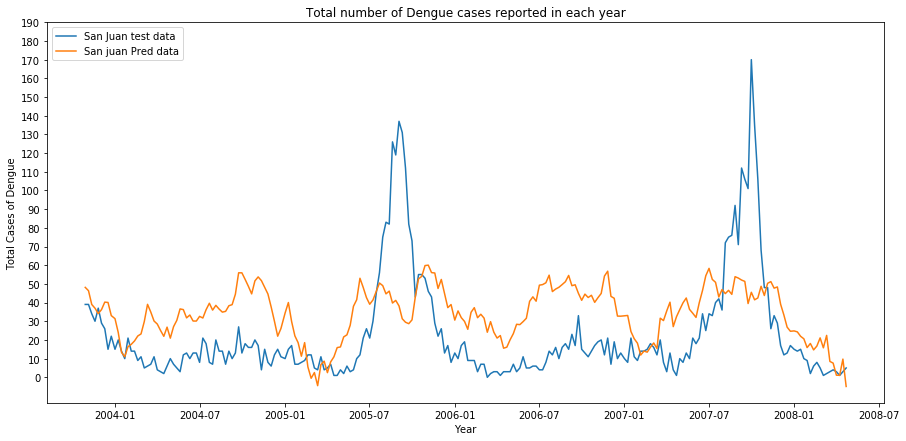

In [37]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_sj_test, label='San Juan test data' )
plt.plot( Y_sj_test.index, Y_sj_pred, label='San juan Pred data')
plt.yticks(np.arange(0,200, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

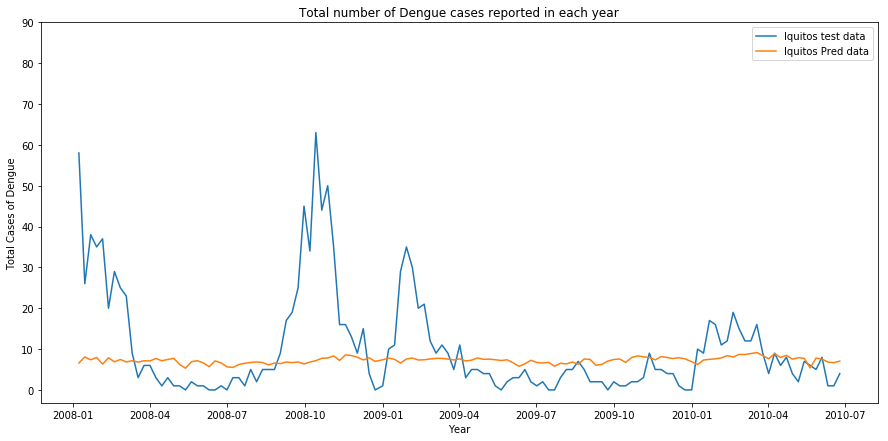

In [38]:
plt.figure( figsize=( 15, 7 ))
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.plot( Y_iq_test, label='Iquitos test data' )
plt.plot( Y_iq_test.index, Y_iq_pred, label='Iquitos Pred data')
plt.yticks(np.arange(0,100, step=10))
plt.title( 'Total number of Dengue cases reported in each year')
plt.legend()
plt.show()

The model is not clearly explains the peaks in the target variable. It might be the reason of some other variable.
As per the 2008 data analysis, I did n't get any clue regarding spike in the data.
Might be other model will explain that.

#####  Linrer Regression Model Results
| Model | city data | MAE | comments |
|:---|:---|:---|:---|
| Linear Regression | San Juan | 27.09 |
| Linear Regression | Iquitos | 9.11 |
| Linear Regression WITH FFS | San Juan | 25.78 |
| Linear Regression WITH FFS | Iquitos | 5.59 |Good Result |
| Linear Regression WITH RFECV | San Juan | 28.06 |
| Linear Regression WITH RFECV | Iquitos | 7.80 | 
| Ridge L2 Regularisation| San Juan | 28.59 |
| Ridge L2 Regularisation | Iquitos | 7.88 | 
| Lasso L1 Regularisation| San Juan | 22.82 | Good Result |
| Lasso L1 Regularisation | Iquitos | 8.02 |

